In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


mimic_path = '/Users/andylim/Downloads/mimic-iv-2.2/'
# read admissions table
def read_admissions_table(mimic4_path):
    admits = pd.read_csv(mimic4_path + 'hosp/admissions.csv.gz')
    # Pre-emptively don't include some columns that I don't need
    admits = admits[['subject_id','hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'insurance']]
    # Converts dates to a proper format
    admits.admittime = pd.to_datetime(admits.admittime)
    admits.dischtime = pd.to_datetime(admits.dischtime)
    admits.deathtime = pd.to_datetime(admits.deathtime)
    return admits

admits = read_admissions_table(mimic_path)
admits.head()





,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,insurance
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaT,URGENT,Other
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaT,EW EMER.,Medicaid
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,EW EMER.,Medicaid
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaT,EW EMER.,Medicaid
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaT,EU OBSERVATION,Other


In [12]:
admits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   subject_id      431231 non-null  int64         
 1   hadm_id         431231 non-null  int64         
 2   admittime       431231 non-null  datetime64[ns]
 3   dischtime       431231 non-null  datetime64[ns]
 4   deathtime       8598 non-null    datetime64[ns]
 5   admission_type  431231 non-null  object        
 6   insurance       431231 non-null  object        
dtypes: datetime64[ns](3), int64(2), object(2)
memory usage: 23.0+ MB


In [13]:
# When DEATHTIME in ADMISSIONS is not null then the patient associated died at the hospital, so we mark this distinction with a boolean variable.
admits['died_at_the_hospital'] = admits['deathtime'].notnull().map({True:1, False:0})

In [14]:
admits['admission_type'].value_counts()

admission_type
EW EMER.                       149413
EU OBSERVATION                  94776
OBSERVATION ADMIT               52668
URGENT                          44691
SURGICAL SAME DAY ADMISSION     34231
DIRECT EMER.                    19554
DIRECT OBSERVATION              18707
ELECTIVE                        10565
AMBULATORY OBSERVATION           6626
Name: count, dtype: int64

In [15]:
admits['admission_type'].replace(to_replace='EW EMER.', value='EMERGENCY', inplace=True)
admits['admission_type'].replace(to_replace='DIRECT EMER.', value='EMERGENCY', inplace=True)
admits['admission_type'].replace(to_replace='URGENT', value='EMERGENCY', inplace=True)
admits['admission_type'].value_counts()

admission_type
EMERGENCY                      213658
EU OBSERVATION                  94776
OBSERVATION ADMIT               52668
SURGICAL SAME DAY ADMISSION     34231
DIRECT OBSERVATION              18707
ELECTIVE                        10565
AMBULATORY OBSERVATION           6626
Name: count, dtype: int64

In [16]:
admits['admission_type'].replace(to_replace='EU OBSERVATION', value='OBSERVATION', inplace=True)
admits['admission_type'].replace(to_replace='OBSERVATION ADMIT', value='OBSERVATION', inplace=True)
admits['admission_type'].replace(to_replace='DIRECT OBSERVATION', value='OBSERVATION', inplace=True)
admits['admission_type'].replace(to_replace='AMBULATORY OBSERVATION', value='OBSERVATION', inplace=True)
admits['admission_type'].value_counts()


admission_type
EMERGENCY                      213658
OBSERVATION                    172777
SURGICAL SAME DAY ADMISSION     34231
ELECTIVE                        10565
Name: count, dtype: int64

In [17]:
# read patients table
def read_patients_table(mimic4_path):
    pats = pd.read_csv(mimic4_path + 'hosp/patients.csv.gz')
    # Pre-emptively don't include some columns that I don't need
    pats = pats[['subject_id', 'gender', 'anchor_age', 'dod']]
    pats.dod = pd.to_datetime(pats.dod)
    return pats

patients = read_patients_table(mimic_path)
patients.head()

,subject_id,gender,anchor_age,dod
0,10000032,F,52,2180-09-09
1,10000048,F,23,NaT
2,10000068,F,19,NaT
3,10000084,M,72,2161-02-13
4,10000102,F,27,NaT


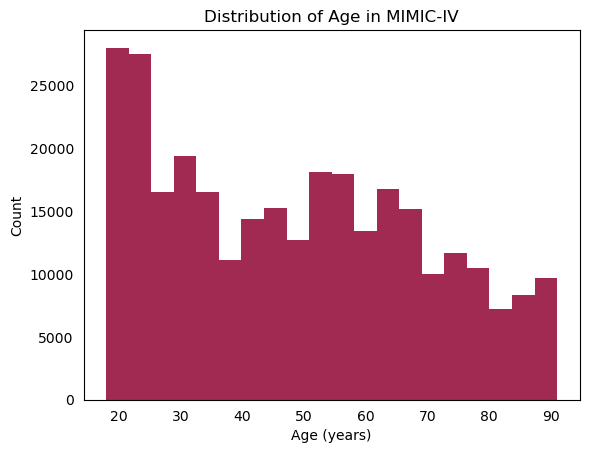

In [18]:
#let's see the distribution of age
plt.hist(patients['anchor_age'], bins=20, color='#a12a52')
plt.ylabel('Count')
plt.xlabel('Age (years)')
plt.title('Distribution of Age in MIMIC-IV')
plt.tick_params(left=False, bottom=False, top=False, right=False) 
plt.show()

In [19]:
patients['gender'].value_counts()

gender
F    158553
M    141159
Name: count, dtype: int64

In [20]:
#merging patient data into admission
admits_patients = pd.merge(admits, patients, how='inner', on='subject_id')
admits_patients.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,insurance,died_at_the_hospital,gender,anchor_age,dod
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaT,EMERGENCY,Other,0,F,52,2180-09-09
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaT,EMERGENCY,Medicaid,0,F,52,2180-09-09
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,EMERGENCY,Medicaid,0,F,52,2180-09-09
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaT,EMERGENCY,Medicaid,0,F,52,2180-09-09
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaT,OBSERVATION,Other,0,F,19,NaT


In [21]:
# read diagnoses_icd table
def read_diagnoses_icd_table(mimic4_path):
    diag_icds = pd.read_csv(mimic4_path + 'hosp/diagnoses_icd.csv.gz')
    return diag_icds

diag_icds = read_diagnoses_icd_table(mimic_path)
diag_icds.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [22]:
diag_icds.count()

subject_id     4756326
hadm_id        4756326
seq_num        4756326
icd_code       4756326
icd_version    4756326
dtype: int64

In [23]:
diag_icds.icd_version.value_counts()

icd_version
9     2766877
10    1989449
Name: count, dtype: int64

In [24]:
#we only look at icd code == 9
diag_icds = diag_icds[diag_icds['icd_version'] == 9]
diag_icds.icd_version.value_counts()

icd_version
9    2766877
Name: count, dtype: int64

In [25]:
print('There are {} unique ICD9 codes in this dataset.'.format(diag_icds['icd_code'].value_counts().count()))

There are 9072 unique ICD9 codes in this dataset.


In [26]:
# Filter out E and V codes from ICD9 codes since processing will be done on the numeric first 3 values
diag_icds['recode'] = diag_icds['icd_code']
diag_icds['recode'] = diag_icds['recode'][~diag_icds['recode'].str.contains("[a-zA-Z]").fillna(False)]
diag_icds['recode'].fillna(value='999', inplace=True)

# Take in consideration just the first 3 integers of the ICD9 code
diag_icds['recode'] = diag_icds['recode'].str.slice(start=0, stop=3, step=1)
diag_icds['recode'] = diag_icds['recode'].astype(int)
diag_icds.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,recode
0,10000032,22595853,1,5723,9,572
1,10000032,22595853,2,78959,9,789
2,10000032,22595853,3,5715,9,571
3,10000032,22595853,4,07070,9,70
4,10000032,22595853,5,496,9,496


In [27]:
# ICD-9 Main Category ranges
icd9_ranges = [(1, 140), (140, 240), (240, 280), (280, 290), (290, 320), (320, 390), 
               (390, 460), (460, 520), (520, 580), (580, 630), (630, 680), (680, 710),
               (710, 740), (740, 760), (760, 780), (780, 800), (800, 1000), (1000, 2000)]

# Associated category names
diag_dict = {0: 'infectious', 1: 'neoplasms', 2: 'endocrine', 3: 'blood',
             4: 'mental', 5: 'nervous', 6: 'circulatory', 7: 'respiratory',
             8: 'digestive', 9: 'genitourinary', 10: 'pregnancy', 11: 'skin', 
             12: 'muscular', 13: 'congenital', 14: 'prenatal', 15: 'misc',
             16: 'injury', 17: 'misc'}

# Re-code in terms of integer
for num, cat_range in enumerate(icd9_ranges):
    diag_icds['recode'] = np.where(diag_icds['recode'].between(cat_range[0],cat_range[1]), num, diag_icds['recode'])
    
# Convert integer to category name using diag_dict
diag_icds['super_category'] = diag_icds['recode'].replace(diag_dict)
diag_icds.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,recode,super_category
0,10000032,22595853,1,5723,9,8,digestive
1,10000032,22595853,2,78959,9,15,misc
2,10000032,22595853,3,5715,9,8,digestive
3,10000032,22595853,4,07070,9,0,infectious
4,10000032,22595853,5,496,9,7,respiratory


In [31]:
# Create list of diagnoses for each admission
hadm_list = diag_icds.groupby('hadm_id')['super_category'].apply(list).reset_index()
hadm_list.head()

,hadm_id,super_category
0,20000019,"[infectious, genitourinary, congenital, genito..."
1,20000041,"[muscular, endocrine, injury, circulatory, end..."
2,20000057,"[muscular, muscular, injury, injury, injury, r..."
3,20000102,"[pregnancy, injury, injury]"
4,20000235,"[digestive, circulatory, digestive, genitourin..."


In [42]:
# Convert diagnoses list into hospital admission-item matrix
hadm_item = pd.get_dummies(hadm_list['super_category'].apply(pd.Series).stack()).groupby(level=0).sum()
hadm_item.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,1,1,1,0,3,2,1,2,0,0,0,0,0,0,0,1,0
1,0,1,0,1,3,0,0,4,0,0,1,0,0,0,0,0,0
2,1,1,0,0,1,0,0,7,0,1,5,0,4,0,1,2,0
3,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0
4,1,6,0,4,2,1,1,2,0,0,0,0,0,0,0,0,1


In [43]:
# Join back with HADM_ID
hadm_item = hadm_item.join(hadm_list['hadm_id'], how="outer")

In [44]:
# Merge with main dataframe
admits_patients_diag = pd.merge(admits_patients, hadm_item, how='inner', on='hadm_id')
admits_patients_diag.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,insurance,died_at_the_hospital,gender,anchor_age,...,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaT,EMERGENCY,Other,0,F,52,...,1,2,1,0,0,0,0,0,1,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaT,EMERGENCY,Medicaid,0,F,52,...,1,1,1,0,0,0,0,0,1,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,EMERGENCY,Medicaid,0,F,52,...,2,1,2,0,0,0,0,0,1,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaT,EMERGENCY,Medicaid,0,F,52,...,3,2,2,0,0,0,0,0,1,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaT,OBSERVATION,Other,0,F,19,...,0,1,0,0,0,0,0,0,0,0


In [45]:
admits_patients_diag.to_csv('admits_patients_diag.csv')